## Excercise 7.1
* Import libraries
* Read in NSFG data
* Make a scatter plot birth weight versus mother's age
* Plot percentiles of birth weight versus mother's age
* Compute Pearson's and Spearman's correlation
* How would you characterize the relationship between these variables?

In [20]:
import thinkstats2
import thinkplot
import first
import numpy as np
import pandas as pd

live, first, others = first.MakeFrames()
live = live.dropna(subset=['agepreg','totalwgt_lb'])
mother_age = live.agepreg
birth_weight = live.totalwgt_lb

Create scatter plots of birth weight versus mother's age.

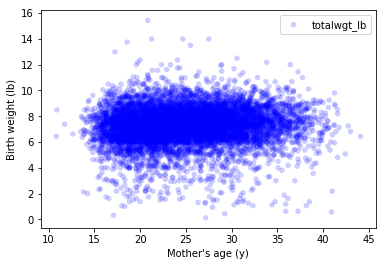

<Figure size 576x432 with 0 Axes>

In [43]:
thinkplot.Scatter(mother_age, birth_weight, alpha = 0.2)
thinkplot.show(xlabel='Mother\'s age (y)', ylabel = 'Birth weight (lb)')

Plot percentiles of birth weight verus mother's age.

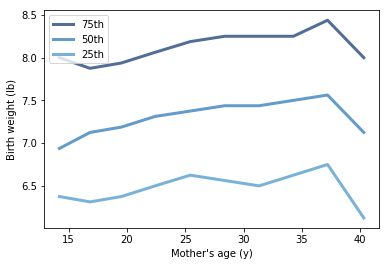

<Figure size 576x432 with 0 Axes>

In [46]:
bins = np.arange(15, 40, 3)
indicies = np.digitize(live.agepreg, bins)
groups = live.groupby(indicies)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Show(xlabel='Mother\'s age (y)',ylabel='Birth weight (lb)')

Calculate Pearson's and Spearman's correlation.

In [42]:
pearsons = thinkstats2.Corr(mother_age, birth_weight)
spearman = thinkstats2.SpearmanCorr(mother_age, birth_weight)

print("Pearson's correlation", pearsons)
print("Spearman's correlation", spearman)

Pearson's correlation 0.06883397035410908
Spearman's correlation 0.09461004109658226


The scatter plot shows no real linear relationship between birth weight and mother's age. Likewise the percentiles of birth weight within 2 year bins also does not show a linear relationship. This is further confirmed by the calculation of Pearson's and Spearman's correlation coefficient, which are near 0. In summary, there is no linear relationship between a mother's age and the weight of their baby.